<h1 style="font-size:3rem;color:#3F778C; text-align:center;">Reto clustering</h1>


<h3 style="color:#6587A1; text-align:center;">Daniela Cortés Méndez<br>Sergio Andrés González Roa<br>Kareen Alejandra Latorre Martínez</h3>

# Imports

In [35]:
import numpy as np, numpy as np_test
import pandas as pd,pandas as pd_test
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from tqdm import tqdm
import datetime

# Importación de los datos

In [36]:
clients = pd.read_csv("./datos_de_clientes.csv", delimiter="\t")
clients.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Pre-procesamiento de los datos


In [37]:
current_year = datetime.datetime.now().year
clients['Age'] = current_year - clients['Year_Birth']

una linea

In [38]:
clients_education_encoded = pd.get_dummies(clients["Education"], prefix="Education", dtype=int)
clients = pd.concat([clients, clients_education_encoded], axis=1)

In [39]:
print(clients['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [40]:
marital_mode = str(clients['Marital_Status'].mode()[0])
print(f"mode: {marital_mode}")
clients['Marital_Status'] = clients['Marital_Status'].replace({'Alone': 'Single', 'Absurd': marital_mode, 'YOLO': marital_mode})
print(clients['Marital_Status'].value_counts())

mode: Married
Marital_Status
Married     868
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64


In [41]:
clients_marital_encoded = pd.get_dummies(clients["Marital_Status"], prefix="Marital_Status", dtype=int)
clients = pd.concat([clients, clients_marital_encoded], axis=1)

In [42]:
fill = KNNImputer(n_neighbors=1).fit_transform(clients[['Income']])
clients['Income'] = pd.DataFrame(fill, columns=['Income'])

In [44]:
clients['Days_Customer'] = (pd.to_datetime(datetime.datetime.now().strftime('%d-%m-%Y'), dayfirst=True) - pd.to_datetime(clients['Dt_Customer'], format='%d-%m-%Y')).dt.days

In [45]:
clients['Total_AcceptedCmp'] = clients['AcceptedCmp1'] + clients['AcceptedCmp2'] + clients['AcceptedCmp3'] + clients['AcceptedCmp4'] + clients['AcceptedCmp5'] + clients['Response']

In [46]:
clients['Total_SpentProducts'] = clients['MntWines'] + clients['MntFruits'] + clients['MntMeatProducts'] + clients['MntFishProducts'] + clients['MntSweetProducts'] + clients['MntGoldProds']

In [47]:
clients = clients.drop(["ID", "Year_Birth", "Education", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"], axis=1) 
clients.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Days_Customer,Total_AcceptedCmp,Total_SpentProducts
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,4219,1,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,3669,0,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,1,0,3868,0,776
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,1,0,3695,0,53
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,1,0,0,0,3717,0,422


## Eliminación de datos atípicos

boxplots

<Figure size 1000x600 with 0 Axes>

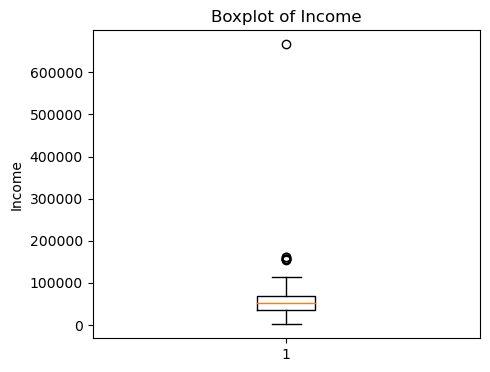

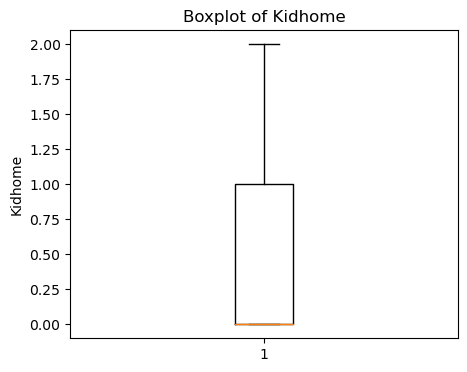

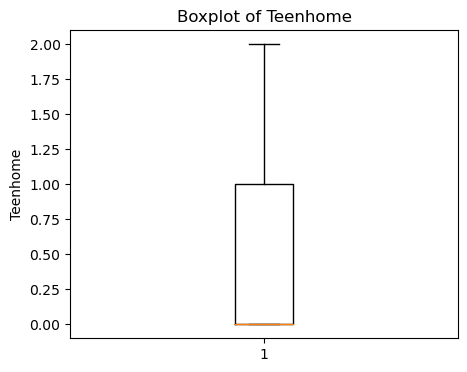

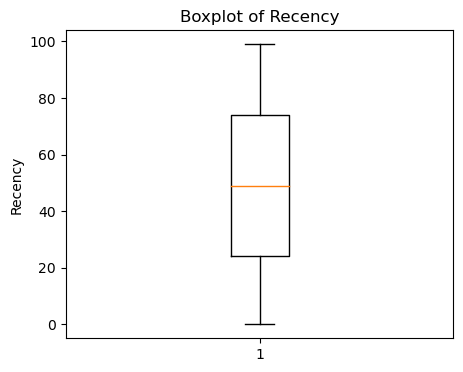

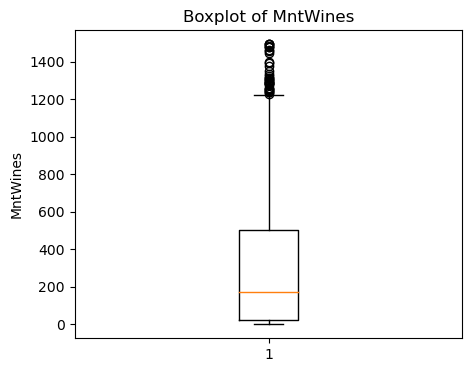

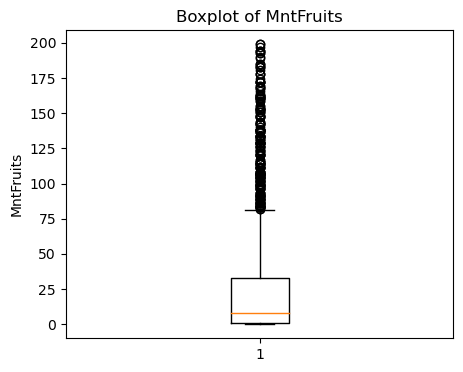

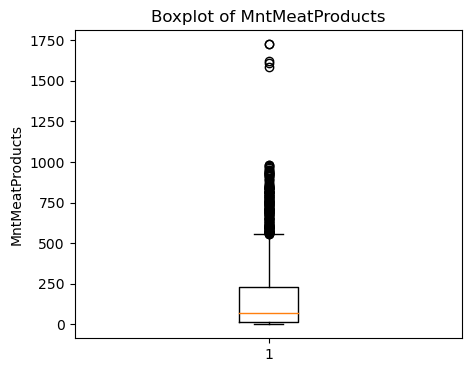

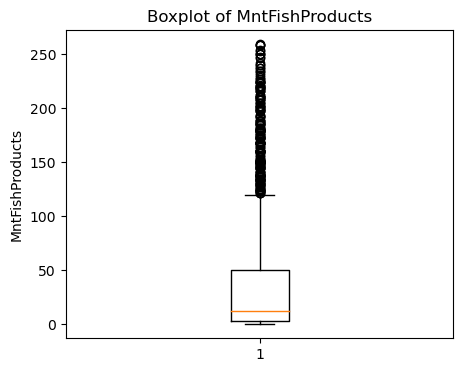

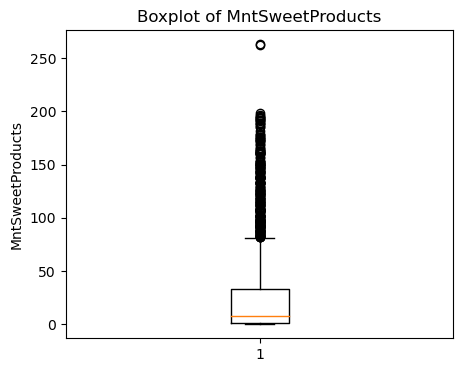

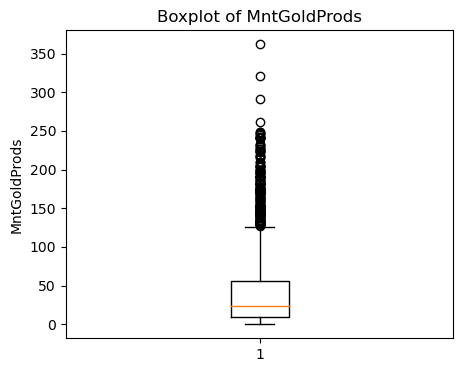

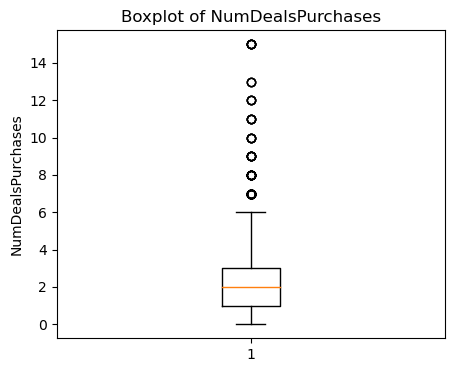

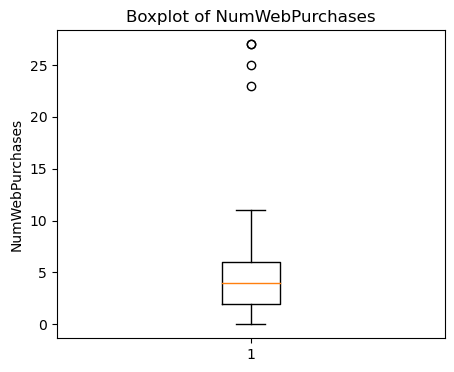

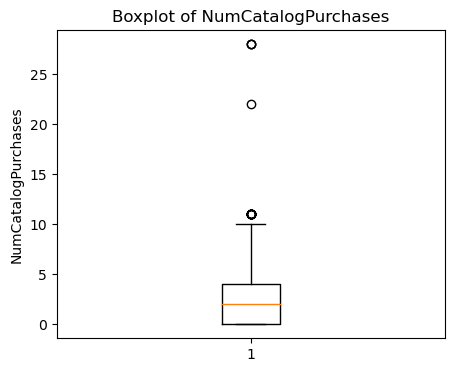

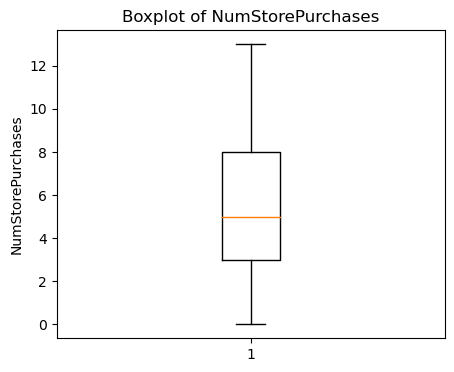

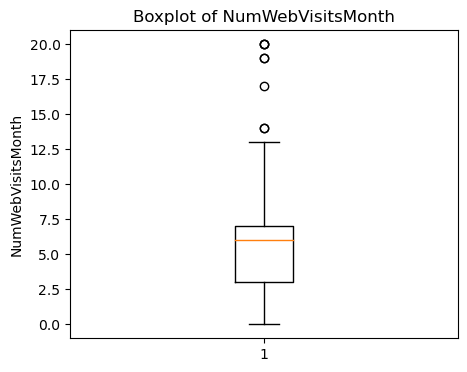

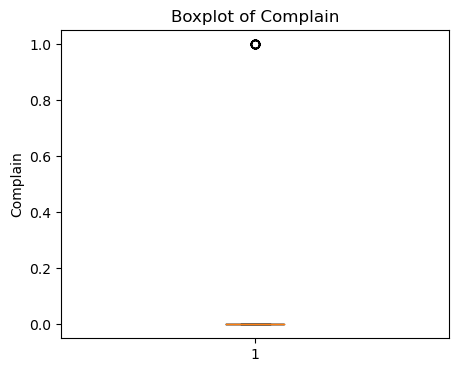

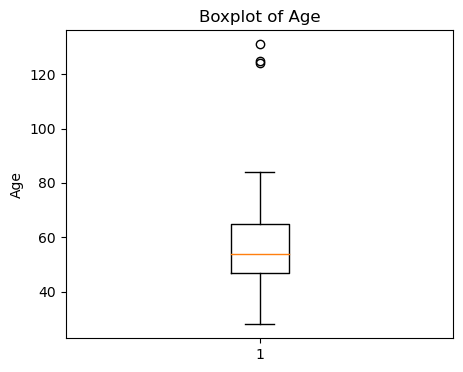

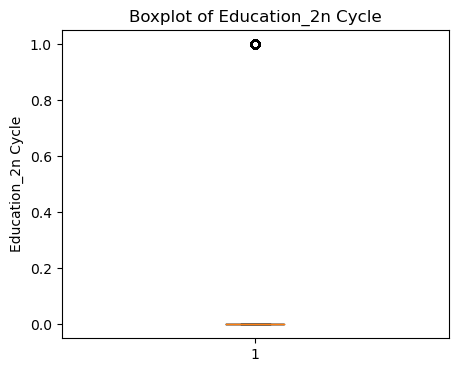

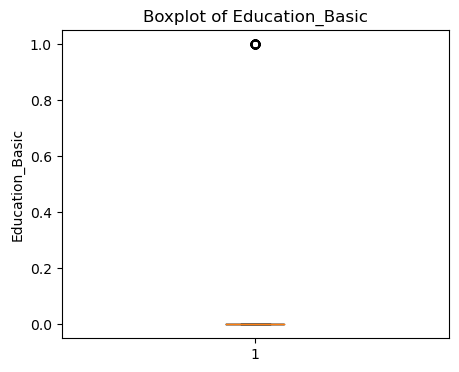

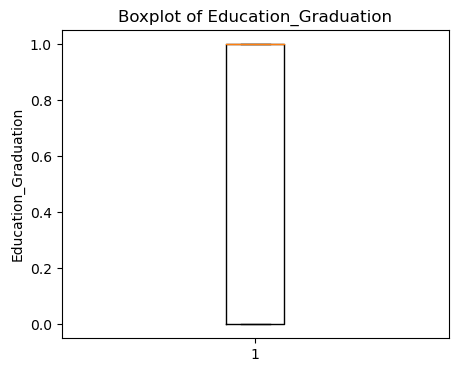

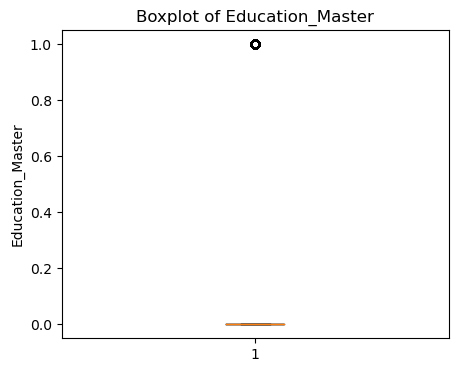

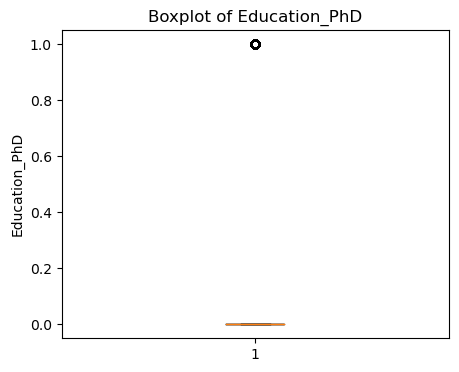

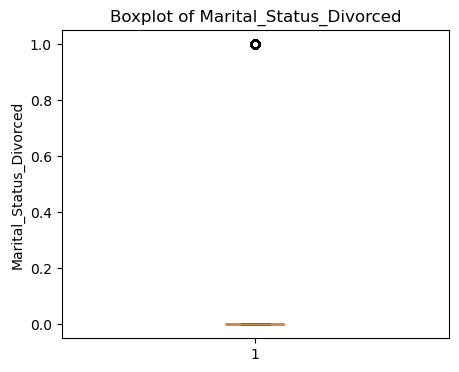

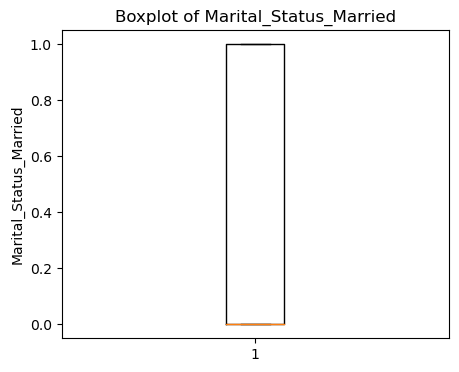

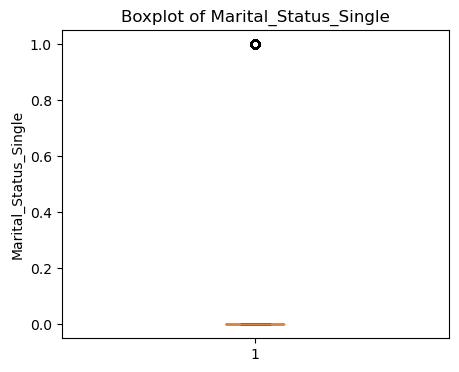

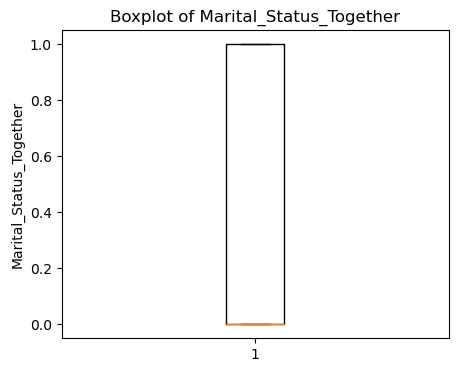

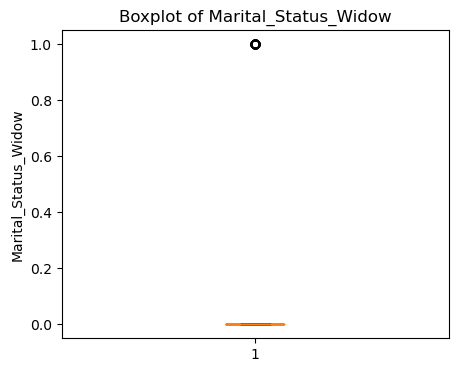

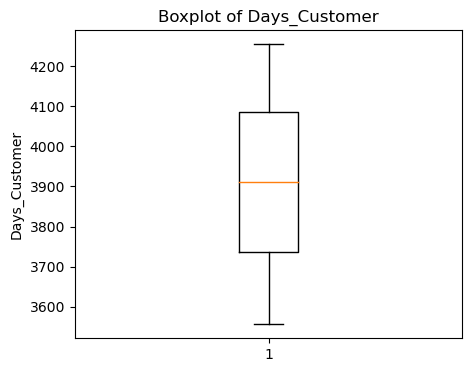

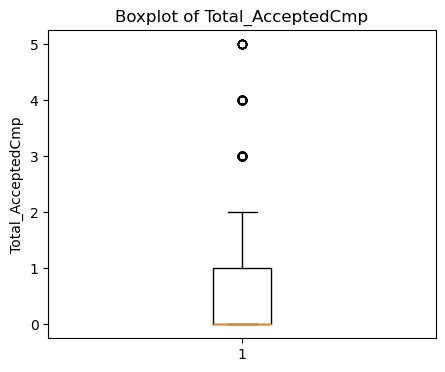

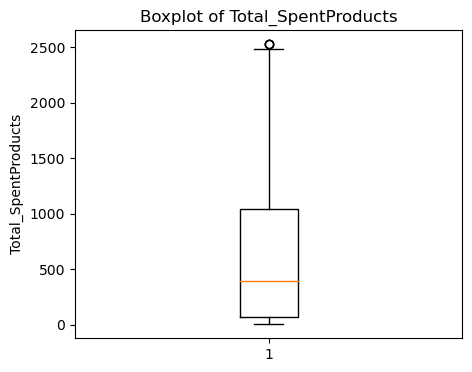

In [53]:
# clients_filtered = clients.columns["Income", "Age"]
 
plt.figure(figsize=(10, 6))

for i, column in enumerate(clients.columns):
    plt.figure(figsize=(5, 4)) 
    plt.boxplot(clients[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


# 

In [54]:
clients.to_csv("nuevo.csv", index=False)

In [49]:
def kMeans(D, k, eps=0.01, mu=None, max_iter=20):
  d = D.shape[1]
  if mu is None:
    mu = np.random.rand(k, d) * (np.max(D, axis=0) - np.min(D, axis=0)) + np.min(D, axis=0)
  if type(mu) == list:
    mu = np.array(mu)
  s = False
  g = 0
  while not s:
    C = [np.argmin([np.linalg.norm(mu[j] - x) for j in range(k) if not any(np.isnan(mu[j]))]) for x in D]
    n = np.zeros(mu.shape)
    s = True
    for i in range(k):
      J = [D[j] for j in range(len(D)) if C[j] == i]
      if len(J) > 0:
        n[i] = np.mean(J, axis=0)
      else:
        n[i] = np.random.rand(1, d) * (np.max(D, axis=0) - np.min(D, axis=0)) + np.min(D, axis=0)
      if np.linalg.norm(mu[i] - n[i]) > eps:
        s = False
    mu = n
    g += 1
    if g >= max_iter:
      s = True
  return C, mu

def calculate_covariance_matrix(A, mu):
    n = A.shape[0]
    centered_data = A - mu
    covariance = np.dot(centered_data.T, centered_data) / n
    return covariance
 
total_v = 0
 
def PCA(D, red):
    global total_v
    cov_matrix = calculate_covariance_matrix(D, np.sum(D, axis=0) / D.shape[0])
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    descending_indices = np.argsort(eigenvalues)[::-1]
    descending_eigenvalues = eigenvalues[descending_indices]
    descending_eigenvectors = eigenvectors[:, descending_indices]
    total_v = np.real(np.sum(descending_eigenvalues))
   
    if red < 1:
        retained_variance = np.cumsum(descending_eigenvalues) / total_v
        r = np.argmax(retained_variance >= red) + 1
    elif isinstance(red, int):
        r = red
   
    A = np.dot(D, descending_eigenvectors[:, :r])
    v = np.real(np.sum(descending_eigenvalues[:r]))
    return A, v


def plotClusters(D, C, dimX, dimY, dimZ=None, ax=None):
  h = type(D) == pd.DataFrame
  W = D.columns[dimX] if h else dimX
  X = D.columns[dimY] if h else dimY
  b = D.columns[dimZ] if h and not dimZ is None else dimZ
  if type(D) == pd.DataFrame:
    D = D.values
  x = np.unique(C)
  K = not dimZ is None
  
  if ax is None:
    if K:
      I = plt.figure()
      ax = I.add_subplot(111, projection='3d')
    else:
      I, ax = plt.subplots()
      
  for ci in x:
    f = np.where(C == ci)[0]
    if K:
      ax.scatter(D[f, dimX], D[f, dimY], D[f, dimZ])
    else:
      ax.scatter(D[f, dimX], D[f, dimY])
      
  ax.set_xlabel(W)
  ax.set_ylabel(X)
  
  if K:
    ax.set_zlabel(b)

ola

In [52]:
clients_2D = PCA(clients.values, 2)[0]
clients_3D = PCA(clients.values, 3)[0]